# 🤖 Logistic Regression Modeling with SGD

In [1]:
# Auto-download dataset if running in Colab
import os
if 'google.colab' in str(get_ipython()):
    !mkdir -p data/raw
    !wget -O data/raw/classification_data.csv https://raw.githubusercontent.com/sdballpark/sgd-logistic-regression/main/data/raw/classification_data.csv


--2025-04-29 05:08:06--  https://raw.githubusercontent.com/sdballpark/sgd-logistic-regression/main/data/raw/classification_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60365 (59K) [text/plain]
Saving to: ‘data/raw/classification_data.csv’

data/raw/classifica 100%[===================>]  58.95K  --.-KB/s    in 0.01s   

2025-04-29 05:08:06 (4.10 MB/s) - ‘data/raw/classification_data.csv’ saved [60365/60365]



Manual SGD Accuracy: 0.9200
sklearn SGDClassifier Accuracy: 0.9100


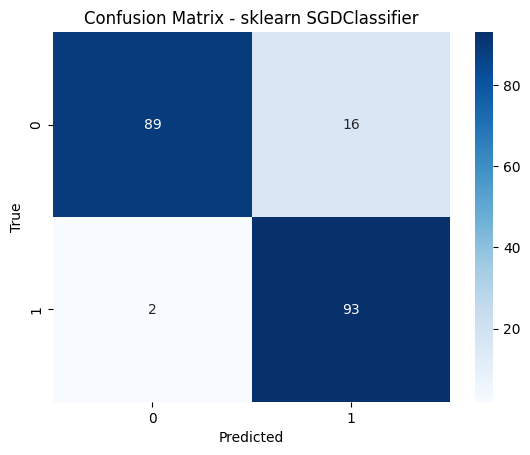

ROC-AUC Score: 0.9133


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data
df = pd.read_csv('data/raw/classification_data.csv')
X = df[['feature1', 'feature2', 'feature3']].values
y = df['label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Manual SGD
class ManualSGDLogisticRegression:
    def __init__(self, lr=0.01, epochs=1000):
        self.lr = lr
        self.epochs = epochs

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        for epoch in range(self.epochs):
            idx = np.random.randint(0, X.shape[0])
            xi = X[idx]
            yi = y[idx]
            linear_model = np.dot(xi, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)

            dw = (y_predicted - yi) * xi
            db = (y_predicted - yi)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        return np.where(y_predicted >= 0.5, 1, 0)

# Train Manual Model
model_manual = ManualSGDLogisticRegression(lr=0.01, epochs=5000)
model_manual.fit(X_train, y_train)
predictions_manual = model_manual.predict(X_test)

print(f"Manual SGD Accuracy: {accuracy_score(y_test, predictions_manual):.4f}")

# Train with sklearn SGDClassifier
model_sklearn = SGDClassifier(loss='log_loss', random_state=42)
model_sklearn.fit(X_train, y_train)
predictions_sklearn = model_sklearn.predict(X_test)

print(f"sklearn SGDClassifier Accuracy: {accuracy_score(y_test, predictions_sklearn):.4f}")

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, predictions_sklearn), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - sklearn SGDClassifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# ROC-AUC
print(f"ROC-AUC Score: {roc_auc_score(y_test, predictions_sklearn):.4f}")
